<a href="https://colab.research.google.com/github/hatef-hosseinpour/dental-clf/blob/main/dental_classification_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install git+https://github.com/reineking/pyds.git

  Cloning https://github.com/reineking/pyds.git to /tmp/pip-req-build-q_qk89qr
  Running command git clone --filter=blob:none --quiet https://github.com/reineking/pyds.git /tmp/pip-req-build-q_qk89qr
  Resolved https://github.com/reineking/pyds.git to commit 30d669c5826366031ae820623e18f0546a3fa3d6
  Preparing metadata (setup.py) ... done


In [ ]:
import os
import cv2
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
from PIL import Image
import gc
import math
from tqdm import tqdm
from pyds import MassFunction, powerset
from scipy.stats import entropy
import warnings

Loading data...
Loaded class distribution: {'amalgam_filling': 142, 'caries': 114, 'healthy': 146}
Loaded 402 images


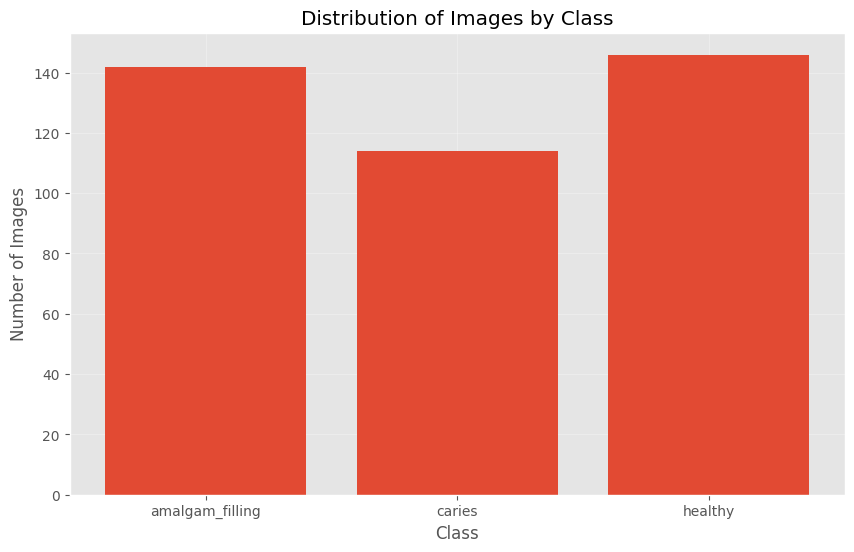

Splitting data...
Train: 256, Validation: 65, Test: 81
Creating datasets and dataloaders...
Initializing models...

Starting training for 30 epochs


Epoch 1/30


Training: 100%|██████████| 8/8 [00:04<00:00,  1.84it/s]


ResNet18 Loss: 0.8807, DenseNet121 Loss: 0.7628


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  4.58it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Accuracy: 0.3385
Saved new best models with validation accuracy: 0.3385

Epoch 2/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.00it/s]


ResNet18 Loss: 0.6436, DenseNet121 Loss: 0.5399


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  5.26it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Accuracy: 0.3692
Saved new best models with validation accuracy: 0.3692

Epoch 3/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.15it/s]


ResNet18 Loss: 0.5417, DenseNet121 Loss: 0.5170


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  5.36it/s]


Validation Accuracy: 0.5692
Saved new best models with validation accuracy: 0.5692

Epoch 4/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.14it/s]


ResNet18 Loss: 0.4788, DenseNet121 Loss: 0.4605


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Validation Accuracy: 0.5385

Epoch 5/30


Training: 100%|██████████| 8/8 [00:04<00:00,  1.98it/s]


ResNet18 Loss: 0.5363, DenseNet121 Loss: 0.3990


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  4.03it/s]


Validation Accuracy: 0.6769
Saved new best models with validation accuracy: 0.6769

Epoch 6/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]


ResNet18 Loss: 0.4665, DenseNet121 Loss: 0.2961


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  5.22it/s]


Validation Accuracy: 0.7077
Saved new best models with validation accuracy: 0.7077

Epoch 7/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]


ResNet18 Loss: 0.4876, DenseNet121 Loss: 0.3872


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  4.32it/s]


Validation Accuracy: 0.8308
Saved new best models with validation accuracy: 0.8308

Epoch 8/30


Training: 100%|██████████| 8/8 [00:04<00:00,  1.91it/s]


ResNet18 Loss: 0.5083, DenseNet121 Loss: 0.3827


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  5.29it/s]


Validation Accuracy: 0.8000

Epoch 9/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.06it/s]


ResNet18 Loss: 0.4779, DenseNet121 Loss: 0.3136


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]


Validation Accuracy: 0.7385

Epoch 10/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]


ResNet18 Loss: 0.4150, DenseNet121 Loss: 0.2628


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  3.38it/s]


Validation Accuracy: 0.7385

Epoch 11/30


Training: 100%|██████████| 8/8 [00:04<00:00,  1.94it/s]


ResNet18 Loss: 0.3797, DenseNet121 Loss: 0.2407


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  4.77it/s]


Validation Accuracy: 0.7846

Epoch 12/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.05it/s]


ResNet18 Loss: 0.3600, DenseNet121 Loss: 0.2238


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  5.19it/s]


Validation Accuracy: 0.8154

Epoch 13/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.04it/s]


ResNet18 Loss: 0.3221, DenseNet121 Loss: 0.2337


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]


Validation Accuracy: 0.7846

Epoch 14/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]


ResNet18 Loss: 0.3652, DenseNet121 Loss: 0.1882


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  5.13it/s]


Validation Accuracy: 0.7692

Epoch 15/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]


ResNet18 Loss: 0.2841, DenseNet121 Loss: 0.1833


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  5.34it/s]


Validation Accuracy: 0.7538

Epoch 16/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]


ResNet18 Loss: 0.2529, DenseNet121 Loss: 0.1505


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  5.20it/s]


Validation Accuracy: 0.8154

Epoch 17/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.11it/s]


ResNet18 Loss: 0.2319, DenseNet121 Loss: 0.1836


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  5.45it/s]


Validation Accuracy: 0.7846

Epoch 18/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.13it/s]


ResNet18 Loss: 0.1894, DenseNet121 Loss: 0.1349


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  5.33it/s]


Validation Accuracy: 0.8000

Epoch 19/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]


ResNet18 Loss: 0.1697, DenseNet121 Loss: 0.1142


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  5.04it/s]


Validation Accuracy: 0.8462
Saved new best models with validation accuracy: 0.8462

Epoch 20/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]


ResNet18 Loss: 0.2170, DenseNet121 Loss: 0.1117


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  5.32it/s]


Validation Accuracy: 0.8154

Epoch 21/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]


ResNet18 Loss: 0.1579, DenseNet121 Loss: 0.0913


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  5.34it/s]


Validation Accuracy: 0.8308

Epoch 22/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.01it/s]


ResNet18 Loss: 0.1266, DenseNet121 Loss: 0.0509


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  3.89it/s]


Validation Accuracy: 0.8462

Epoch 23/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.03it/s]


ResNet18 Loss: 0.1457, DenseNet121 Loss: 0.0398


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  5.30it/s]


Validation Accuracy: 0.8308

Epoch 24/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.12it/s]


ResNet18 Loss: 0.1336, DenseNet121 Loss: 0.0532


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  5.40it/s]


Validation Accuracy: 0.8308

Epoch 25/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.11it/s]


ResNet18 Loss: 0.1194, DenseNet121 Loss: 0.0397


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  5.29it/s]


Validation Accuracy: 0.8154

Epoch 26/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.09it/s]


ResNet18 Loss: 0.1085, DenseNet121 Loss: 0.0323


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]


Validation Accuracy: 0.8462

Epoch 27/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.07it/s]


ResNet18 Loss: 0.1047, DenseNet121 Loss: 0.0406


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  5.32it/s]


Validation Accuracy: 0.8308

Epoch 28/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.02it/s]


ResNet18 Loss: 0.0854, DenseNet121 Loss: 0.0304


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  4.85it/s]


Validation Accuracy: 0.8154

Epoch 29/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.08it/s]


ResNet18 Loss: 0.0841, DenseNet121 Loss: 0.0301


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  5.17it/s]


Validation Accuracy: 0.8154

Epoch 30/30


Training: 100%|██████████| 8/8 [00:03<00:00,  2.10it/s]


ResNet18 Loss: 0.0711, DenseNet121 Loss: 0.0270


Evaluating val: 100%|██████████| 3/3 [00:00<00:00,  5.30it/s]


Validation Accuracy: 0.8308


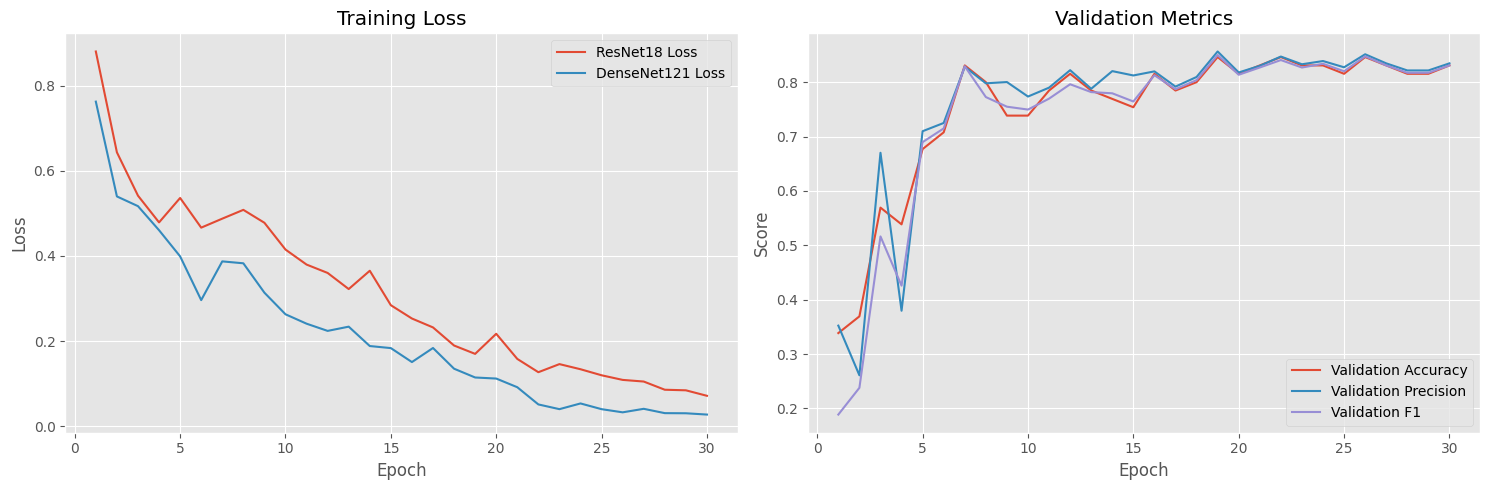


Performing final evaluation...


Evaluating test:   0%|          | 0/3 [00:00<?, ?it/s]

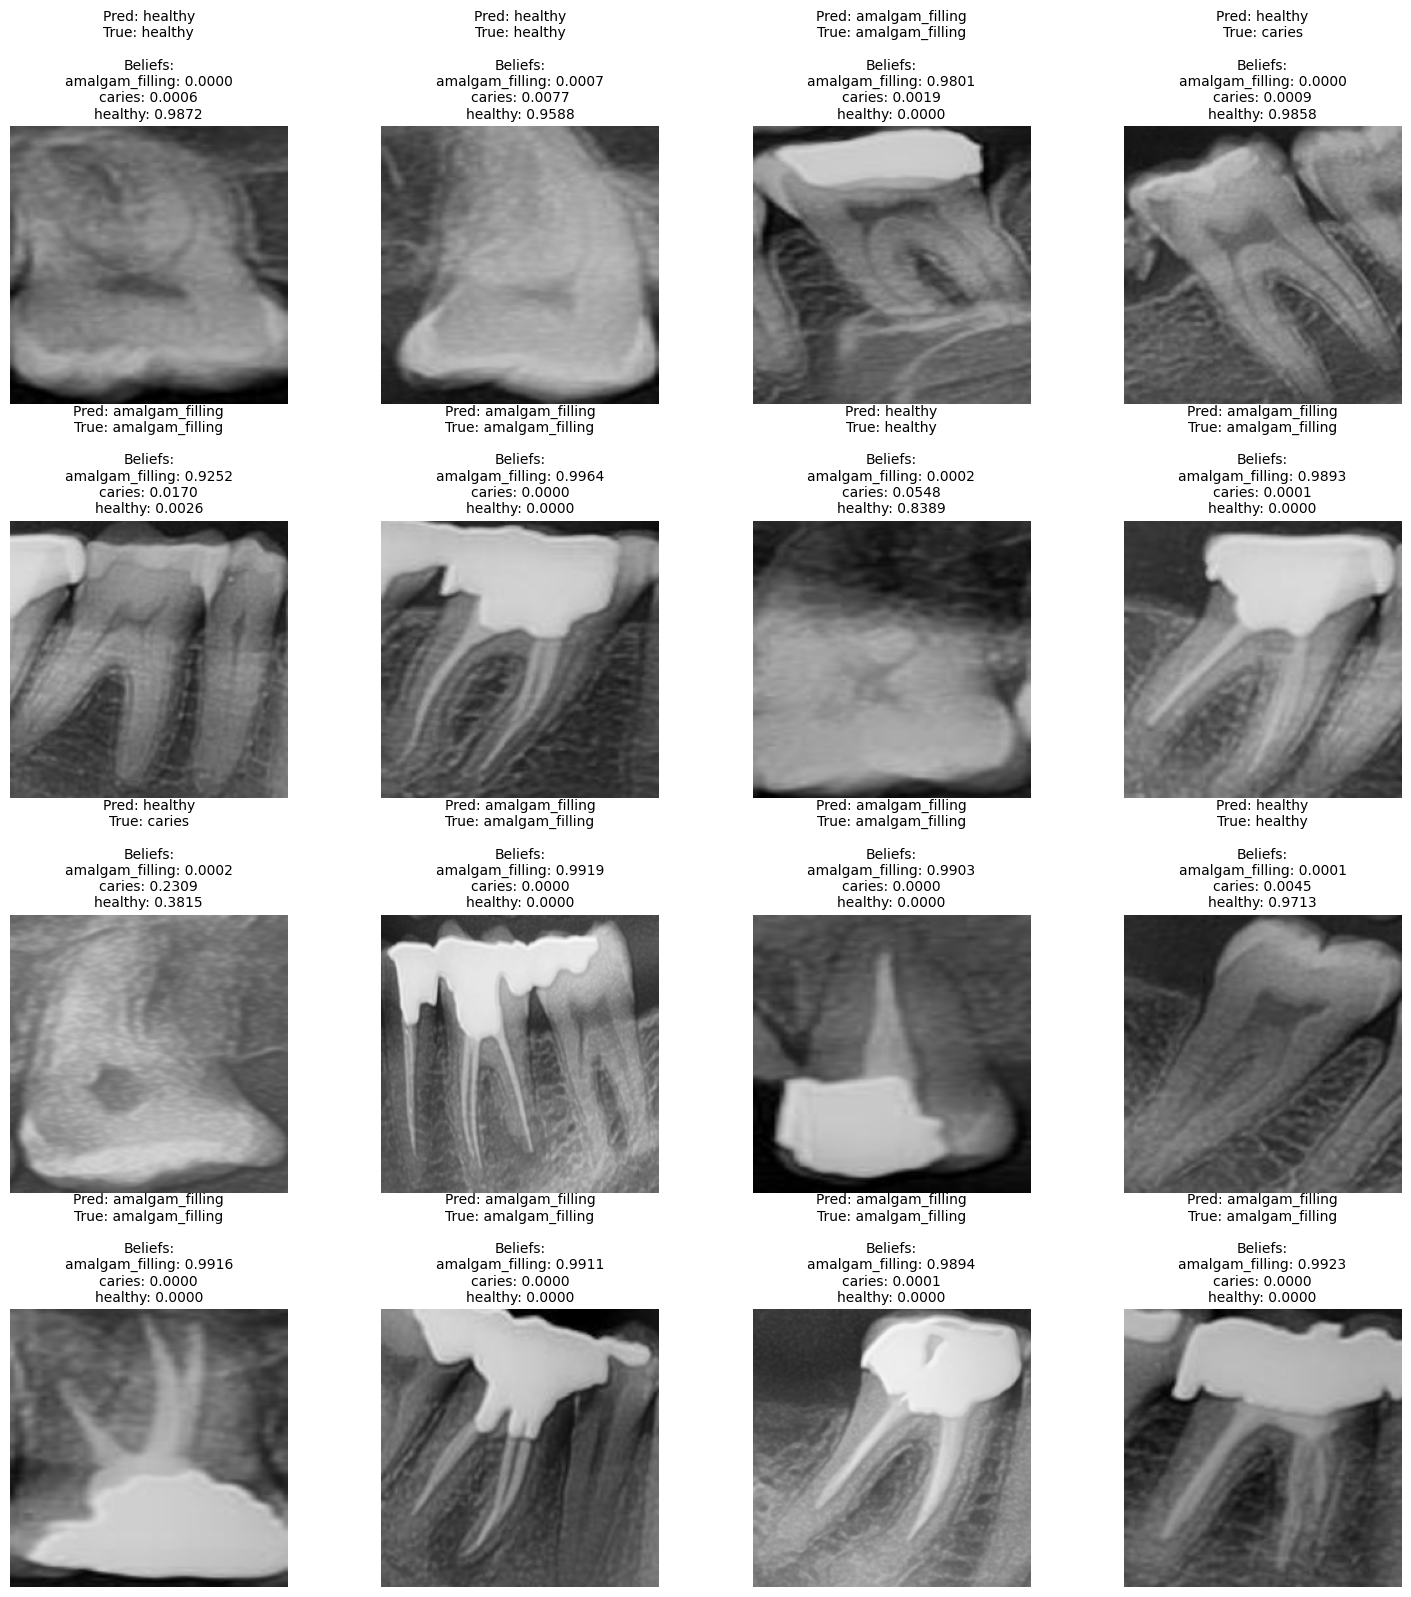

Evaluating test: 100%|██████████| 3/3 [00:03<00:00,  1.28s/it]



----- Detailed Metrics -----
Accuracy: 0.9383
Precision: 0.9412
Recall: 0.9383
F1 Score: 0.9374


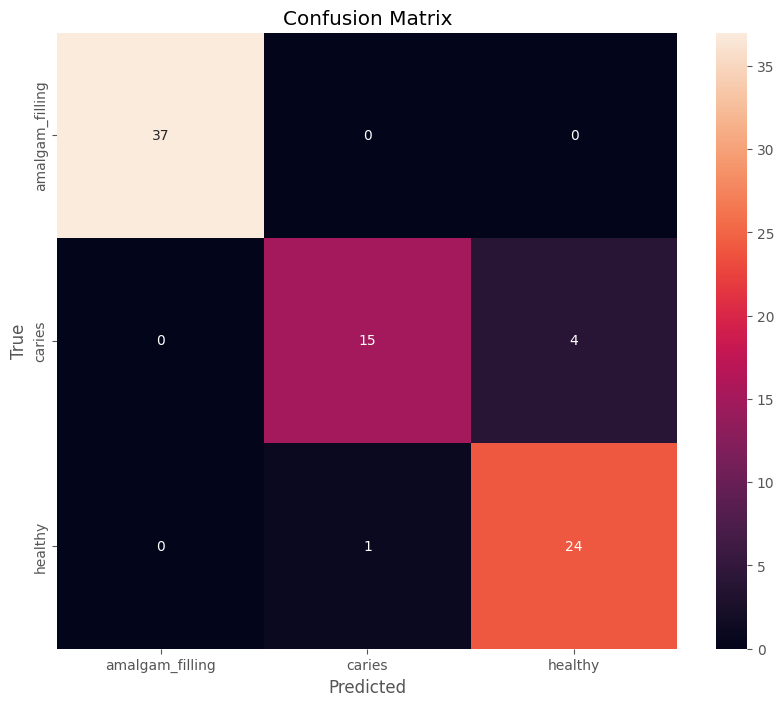

FINAL RESULTS:
Test Accuracy: 0.9383
Test Precision: 0.9412
Test Recall: 0.9383
Test F1 Score: 0.9374
Results saved to /content/drive/MyDrive/Dentisrty/metrics/ds_final_results.csv


In [ ]:

# Set global configuration with the SAME parameters as your successful implementation
CONFIG = {
    'IMAGE_SIZE': 224,  # Important: Use the same image size as your successful model
    'BATCH_SIZE': 32,
    'LEARNING_RATE': 0.001,
    'EPOCHS': 30,
    'SEED': 42,
    'DEVICE': torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    'NORMALIZATION_MEAN': [0.5, 0.5, 0.5],
    'NORMALIZATION_STD': [0.5, 0.5, 0.5],
    'SAVE_PATH': "/content/drive/MyDrive/Dentisrty/models/",
    'METRICS_PATH': "/content/drive/MyDrive/Dentisrty/metrics/"
}

# Define the label mapping
LABEL_MAPPING = {'amalgam_filling': 0, 'caries': 1, 'healthy': 2}

def seed_everything(seed_value=42):
    """Set seed for reproducibility across all libraries"""
    import random
    random.seed(seed_value)
    np.random.seed(seed_value)
    torch.manual_seed(seed_value)
    torch.cuda.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = str(seed_value)

# Set the seed for reproducibility
seed_everything(CONFIG['SEED'])

# Define transforms with the SAME parameters as your successful implementation
# train_transforms = transforms.Compose([
#     transforms.Resize((CONFIG['IMAGE_SIZE'], CONFIG['IMAGE_SIZE'])),
#     transforms.RandomHorizontalFlip(p=0.5),
#     transforms.RandomRotation(45),
#     transforms.ColorJitter(brightness=0.2, contrast=0.2),
#     transforms.ToTensor(),
#     transforms.Normalize(CONFIG['NORMALIZATION_MEAN'], CONFIG['NORMALIZATION_STD'])
# ])
# Original transforms (keep as backup)
train_transforms_original = transforms.Compose([
    transforms.Resize((CONFIG['IMAGE_SIZE'], CONFIG['IMAGE_SIZE'])),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(45),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(CONFIG['NORMALIZATION_MEAN'], CONFIG['NORMALIZATION_STD'])
])

# Enhanced transforms with more augmentation
train_transforms = transforms.Compose([
    transforms.Resize((CONFIG['IMAGE_SIZE'], CONFIG['IMAGE_SIZE'])),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.2),  # Add vertical flip
    transforms.RandomRotation(45),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1)),  # Add translation and scaling
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.2, hue=0.1),  # Enhanced color jitter
    transforms.RandomPerspective(distortion_scale=0.2, p=0.3),  # Add perspective distortion
    transforms.RandomApply([transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0))], p=0.2),  # Add blur
    transforms.ToTensor(),
    transforms.Normalize(CONFIG['NORMALIZATION_MEAN'], CONFIG['NORMALIZATION_STD'])
])

# Alternative strong augmentation (you can switch between them)
train_transforms_strong = transforms.Compose([
    transforms.Resize((CONFIG['IMAGE_SIZE'], CONFIG['IMAGE_SIZE'])),
    transforms.RandomHorizontalFlip(p=0.6),
    transforms.RandomRotation(60),  # More rotation
    transforms.RandomAffine(degrees=0, translate=(0.15, 0.15), scale=(0.85, 1.15), shear=10),
    transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.3, hue=0.15),
    transforms.RandomPerspective(distortion_scale=0.3, p=0.4),
    transforms.RandomApply([transforms.GaussianBlur(kernel_size=5, sigma=(0.1, 3.0))], p=0.3),
    transforms.RandomGrayscale(p=0.1),  # Occasionally convert to grayscale
    transforms.ToTensor(),
    transforms.Normalize(CONFIG['NORMALIZATION_MEAN'], CONFIG['NORMALIZATION_STD'])
])

# Keep validation transforms unchanged
val_transforms = transforms.Compose([
    transforms.Resize((CONFIG['IMAGE_SIZE'], CONFIG['IMAGE_SIZE'])),
    transforms.ToTensor(),
    transforms.Normalize(CONFIG['NORMALIZATION_MEAN'], CONFIG['NORMALIZATION_STD'])
])

# Optional: Create a mixed augmentation strategy that randomly selects transform strength
class MixedAugmentation:
    def __init__(self, transform_light, transform_strong, strong_prob=0.3):
        self.transform_light = transform_light
        self.transform_strong = transform_strong
        self.strong_prob = strong_prob

    def __call__(self, img):
        if np.random.random() < self.strong_prob:
            return self.transform_strong(img)
        else:
            return self.transform_light(img)

# Usage example for mixed augmentation:
# train_transforms_mixed = MixedAugmentation(train_transforms_original, train_transforms_strong)

# Test-Time Augmentation (TTA) transforms for inference
tta_transforms = [
    transforms.Compose([
        transforms.Resize((CONFIG['IMAGE_SIZE'], CONFIG['IMAGE_SIZE'])),
        transforms.ToTensor(),
        transforms.Normalize(CONFIG['NORMALIZATION_MEAN'], CONFIG['NORMALIZATION_STD'])
    ]),
    transforms.Compose([
        transforms.Resize((CONFIG['IMAGE_SIZE'], CONFIG['IMAGE_SIZE'])),
        transforms.RandomHorizontalFlip(p=1.0),  # Always flip
        transforms.ToTensor(),
        transforms.Normalize(CONFIG['NORMALIZATION_MEAN'], CONFIG['NORMALIZATION_STD'])
    ]),
    transforms.Compose([
        transforms.Resize((CONFIG['IMAGE_SIZE'], CONFIG['IMAGE_SIZE'])),
        transforms.RandomRotation((-10, 10)),
        transforms.ToTensor(),
        transforms.Normalize(CONFIG['NORMALIZATION_MEAN'], CONFIG['NORMALIZATION_STD'])
    ])
]


val_transforms = transforms.Compose([
    transforms.Resize((CONFIG['IMAGE_SIZE'], CONFIG['IMAGE_SIZE'])),
    transforms.ToTensor(),
    transforms.Normalize(CONFIG['NORMALIZATION_MEAN'], CONFIG['NORMALIZATION_STD'])
])

class DentalDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

def load_data(data_dir):
    """Load images and labels from directories"""
    images = []
    labels = []
    label_counts = {label: 0 for label in LABEL_MAPPING.keys()}

    for class_name, label_idx in LABEL_MAPPING.items():
        folder_path = os.path.join(data_dir, class_name)
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            try:
                image = cv2.imread(file_path, cv2.IMREAD_COLOR)
                if image is not None:
                    # Convert BGR to RGB
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    image = Image.fromarray(image)
                    images.append(image)
                    labels.append(label_idx)
                    label_counts[class_name] += 1
            except Exception as e:
                print(f"Error loading {file_path}: {e}")

    print(f"Loaded class distribution: {label_counts}")
    return images, labels

def plot_distribution(labels):
    """Plot the distribution of classes"""
    plt.figure(figsize=(10, 6))
    plt.title('Distribution of Images by Class')
    plt.xlabel('Class')
    plt.ylabel('Number of Images')

    label_counts = {}
    for label in labels:
        if label in label_counts:
            label_counts[label] += 1
        else:
            label_counts[label] = 1

    x = list(LABEL_MAPPING.keys())
    y = [label_counts.get(LABEL_MAPPING[key], 0) for key in x]

    plt.bar(x, y)
    plt.grid(True, alpha=0.3)
    plt.show()

def build_models():
    """Build ResNet18 and DenseNet121 models"""
    # ResNet18
    model_resnet18 = models.resnet18(weights='IMAGENET1K_V1')
    model_resnet18.fc = nn.Linear(model_resnet18.fc.in_features, len(LABEL_MAPPING))

    # DenseNet121
    model_densenet121 = models.densenet121(weights='IMAGENET1K_V1')
    model_densenet121.classifier = nn.Linear(model_densenet121.classifier.in_features, len(LABEL_MAPPING))

    return model_resnet18.to(CONFIG['DEVICE']), model_densenet121.to(CONFIG['DEVICE'])

def logits_to_mass_improved(logits):
    """
    Improved function to convert logits to mass functions with adaptive uncertainty.

    Args:
        logits: Raw model outputs

    Returns:
        MassFunction object
    """
    # Convert to numpy and apply softmax to get probabilities
    logits = np.array(logits)
    probs = torch.softmax(torch.tensor(logits), dim=0).numpy()

    # Get class names and prepare empty mass dictionary
    mass = {}
    class_names = list(LABEL_MAPPING.keys())
    num_classes = len(probs)
    # Calculate entropy of the probability distribution to measure uncertainty
    h = entropy(probs, base=np.e) # Normalized entropy [0,1]

    # Maximum possible entropy for this number of classes
    max_h = np.log(num_classes)  # For normalized entropy using the number of classes as the base

    # Calculate adaptive uncertainty using the formula: 0.1 + 0.8 * (h / max_h)
    # This gives a minimum uncertainty of 0.1 and a maximum of 0.9
    uncertainty = 0.1 + 0.8 * (h / max_h)

    # Get all possible subsets using pyds powerset
    all_subsets = [s for s in list(powerset(class_names)) if s]  # Exclude empty set

    # Assign mass to singleton classes based on their probabilities
    # but reduced by the uncertainty
    for i, class_name in enumerate(class_names):
        subset = frozenset([class_name])
        mass[subset] = float(probs[i] * (1 - uncertainty))

    # Distribute uncertainty mass to combination sets
    multi_class_subsets = [s for s in all_subsets if len(s) > 1]

    if multi_class_subsets and uncertainty > 0:
        # Calculate distribution weights based on pairwise products of the components
        weights = []
        for subset in multi_class_subsets:
            # Use product of probabilities to calculate the weight
            subset_probs = [probs[LABEL_MAPPING[cls]] for cls in subset]
            weight = np.prod(subset_probs)
            weights.append(weight)

        # Normalize weights and distribute uncertainty
        weight_sum = sum(weights)
        if weight_sum > 0:
            for i, subset in enumerate(multi_class_subsets):
                mass[subset] = float(uncertainty * (weights[i] / weight_sum))
        else:
            # If all weights are zero, distribute uncertainty equally
            for subset in multi_class_subsets:
                mass[subset] = float(uncertainty / len(multi_class_subsets))

    # Ensure the sum is exactly 1.0 by adjusting the largest mass
    total_mass = sum(mass.values())
    if total_mass > 0 and abs(total_mass - 1.0) > 1e-10:
        largest_key = max(mass.keys(), key=lambda k: mass[k])
        mass[largest_key] = mass[largest_key] + (1.0 - total_mass)

    # Create and return the mass function
    return MassFunction(mass)

def train_models(model_1, model_2, train_loader, criterion, model_1_optimizer, model_2_optimizer):
    """Train both models for one epoch"""
    model_1.train()
    model_2.train()

    total_model_1_loss = 0
    total_model_2_loss = 0
    num_batches = len(train_loader)

    for inputs, labels in tqdm(train_loader, desc='Training'):
        inputs, labels = inputs.to(CONFIG['DEVICE']), labels.to(CONFIG['DEVICE'])

        # Train model 1 (ResNet18)
        model_1_optimizer.zero_grad()
        model_1_outputs = model_1(inputs)
        model_1_loss = criterion(model_1_outputs, labels)
        model_1_loss.backward()
        model_1_optimizer.step()
        total_model_1_loss += model_1_loss.item()

        # Train model 2 (DenseNet121)
        model_2_optimizer.zero_grad()
        model_2_outputs = model_2(inputs)
        model_2_loss = criterion(model_2_outputs, labels)
        model_2_loss.backward()
        model_2_optimizer.step()
        total_model_2_loss += model_2_loss.item()

    return total_model_1_loss / num_batches, total_model_2_loss / num_batches

def combine_masses(mass1, mass2):
    """Dempster's rule of combination with conflict handling"""
    try:
        # Try normal combination
        result = mass1 & mass2
        return result
    except Exception as e:
        print(f"Dempster's combination error: {e}")
        # Fall back to a mixture in case of high conflict
        combined = {}
        for k in set(mass1.keys()) | set(mass2.keys()):
            combined[k] = (mass1[k] + mass2[k]) / 2
        return MassFunction(combined)

def evaluate_with_ds(model_1, model_2, dataloader, phase="val", visualize=False):
    """Evaluate using both models as evidence sources"""
    model_1.eval()
    model_2.eval()

    total_acc = 0
    total_count = 0
    all_labels = []
    all_preds = []
    all_probs = []
    all_combined_masses = []

    label_name_to_idx = LABEL_MAPPING
    label_idx_to_name = {v: k for k, v in LABEL_MAPPING.items()}

    with torch.no_grad():
        for batch_idx, (images, labels) in enumerate(tqdm(dataloader, desc=f'Evaluating {phase}')):
            images, labels = images.to(CONFIG['DEVICE']), labels.to(CONFIG['DEVICE'])

            # Get predictions from both models
            model_1_outputs = model_1(images)
            model_2_outputs = model_2(images)

            model_1_probs = torch.softmax(model_1_outputs, dim=1)
            model_2_probs = torch.softmax(model_2_outputs, dim=1)

            batch_masses = []
            batch_beliefs = []

            for i in range(len(images)):
                # Convert logits to mass functions with improved method
                model_1_mass = logits_to_mass_improved(model_1_outputs[i].cpu().numpy())
                model_2_mass = logits_to_mass_improved(model_2_outputs[i].cpu().numpy())

                # Combine evidence using Dempster's rule
                combined_mass = combine_masses(model_1_mass, model_2_mass)
                batch_masses.append(combined_mass)

                # Calculate beliefs for each class
                beliefs = {}
                for label in LABEL_MAPPING.keys():
                    beliefs[label] = combined_mass.bel({label})
                batch_beliefs.append(beliefs)

                # Make prediction based on maximum belief
                pred_class = max(beliefs.items(), key=lambda x: x[1])[0]
                pred_idx = label_name_to_idx[pred_class]

                # Update metrics
                total_acc += (pred_idx == labels[i].item())
                total_count += 1

                # Store results
                all_labels.append(labels[i].cpu().item())
                all_preds.append(pred_idx)

                # Average probabilities from both models as a crude fusion approach
                combined_probs = (model_1_probs[i] + model_2_probs[i]) / 2
                all_probs.append(combined_probs.cpu().numpy())
                all_combined_masses.append(combined_mass)

            # Visualize results for first batch in test phase
            if visualize and phase == "test" and batch_idx == 0:
                visualize_results(images, batch_beliefs, labels, batch_idx)

    # Calculate metrics
    accuracy = total_acc / total_count
    all_labels_np = np.array(all_labels)
    all_preds_np = np.array(all_preds)

    # Compute metrics
    metrics = {
        'accuracy': accuracy,
        'precision': precision_score(all_labels_np, all_preds_np, average='weighted'),
        'recall': recall_score(all_labels_np, all_preds_np, average='weighted'),
        'f1_score': f1_score(all_labels_np, all_preds_np, average='weighted'),
        'confusion_matrix': confusion_matrix(all_labels_np, all_preds_np)
    }

    if phase == "test":
        print_detailed_metrics(metrics)

    return accuracy, metrics, all_combined_masses

def print_detailed_metrics(metrics):
    """Print detailed metrics for test evaluation"""
    print("\n----- Detailed Metrics -----")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1 Score: {metrics['f1_score']:.4f}")

    # Display confusion matrix
    cm = metrics['confusion_matrix']

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=list(LABEL_MAPPING.keys()),
                yticklabels=list(LABEL_MAPPING.keys()))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

def visualize_results(images, batch_beliefs, labels, batch_idx=0):
    """Visualize prediction results"""
    num_images = min(16, len(images))
    grid_cols = 4
    grid_rows = math.ceil(num_images / grid_cols)

    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(15, 4 * grid_rows))
    if grid_rows == 1 and grid_cols == 1:
        axes = np.array([axes])
    axes = axes.flatten()

    # Get mapping from index to label name
    label_idx_to_name = {v: k for k, v in LABEL_MAPPING.items()}

    for i, ax in enumerate(axes):
        if i < num_images:
            # Get image
            img = images[i].cpu().numpy().transpose(1, 2, 0)
            img = img * np.array(CONFIG['NORMALIZATION_STD']) + np.array(CONFIG['NORMALIZATION_MEAN'])
            img = np.clip(img, 0, 1)

            # Get beliefs and make prediction
            beliefs = batch_beliefs[i]
            pred_class = max(beliefs.items(), key=lambda x: x[1])[0]
            true_class = label_idx_to_name[labels[i].item()]

            # Format belief text
            belief_text = "\n".join(f"{label}: {belief:.4f}" for label, belief in beliefs.items())

            # Show image with predictions
            ax.imshow(img)
            ax.axis('off')
            ax.set_title(f"Pred: {pred_class}\nTrue: {true_class}\n\nBeliefs:\n{belief_text}", fontsize=10)

            # Highlight incorrect predictions
            if pred_class != true_class:
                for spine in ax.spines.values():
                    spine.set_edgecolor('red')
                    spine.set_linewidth(3)
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.savefig(f'ds_prediction_batch_{batch_idx}.png')
    plt.show()

def main():
    # Set the data directory
    data_dir = '/content/drive/MyDrive/Dentisrty/panoramic_data'

    # Load data
    print("Loading data...")
    images, labels = load_data(data_dir)
    print(f"Loaded {len(images)} images")

    # Plot class distribution
    plot_distribution(labels)

    # Split data
    print("Splitting data...")
    X_train, X_test, y_train, y_test = train_test_split(
        images, labels, test_size=0.2, random_state=CONFIG['SEED']
    )
    X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=CONFIG['SEED']
    )

    print(f"Train: {len(X_train)}, Validation: {len(X_val)}, Test: {len(X_test)}")

    # Create datasets and dataloaders
    print("Creating datasets and dataloaders...")
    train_dataset = DentalDataset(X_train, y_train, transform=train_transforms)
    val_dataset = DentalDataset(X_val, y_val, transform=val_transforms)
    test_dataset = DentalDataset(X_test, y_test, transform=val_transforms)

    train_loader = DataLoader(train_dataset, batch_size=CONFIG['BATCH_SIZE'], shuffle=True, num_workers=2, pin_memory=True)
    val_loader = DataLoader(val_dataset, batch_size=CONFIG['BATCH_SIZE'], shuffle=False, num_workers=2, pin_memory=True)
    test_loader = DataLoader(test_dataset, batch_size=CONFIG['BATCH_SIZE'], shuffle=False, num_workers=2, pin_memory=True)

    # Initialize models and optimizers
    print("Initializing models...")
    model_resnet18, model_densenet121 = build_models()

    criterion = nn.CrossEntropyLoss()
    model_1_optimizer = optim.AdamW(model_resnet18.parameters(), lr=CONFIG['LEARNING_RATE'], weight_decay=1e-4)
    model_2_optimizer = optim.AdamW(model_densenet121.parameters(), lr=CONFIG['LEARNING_RATE'], weight_decay=1e-4)

    # Create schedulers
    model_1_scheduler = optim.lr_scheduler.CosineAnnealingLR(model_1_optimizer, T_max=CONFIG['EPOCHS'])
    model_2_scheduler = optim.lr_scheduler.CosineAnnealingLR(model_2_optimizer, T_max=CONFIG['EPOCHS'])

    # Training loop
    print(f"\n{'='*50}")
    print(f"Starting training for {CONFIG['EPOCHS']} epochs")
    print(f"{'='*50}\n")

    best_val_accuracy = 0.0
    metrics_history = []

    for epoch in range(CONFIG['EPOCHS']):
        print(f'\nEpoch {epoch+1}/{CONFIG["EPOCHS"]}')

        # Train
        model_1_loss, model_2_loss = train_models(
            model_resnet18, model_densenet121, train_loader,
            criterion, model_1_optimizer, model_2_optimizer
        )

        # Step schedulers
        model_1_scheduler.step()
        model_2_scheduler.step()

        print(f'ResNet18 Loss: {model_1_loss:.4f}, DenseNet121 Loss: {model_2_loss:.4f}')

        # Validate
        val_accuracy, val_metrics, _ = evaluate_with_ds(
            model_resnet18, model_densenet121, val_loader, "val"
        )
        print(f'Validation Accuracy: {val_accuracy:.4f}')

        # Save best models
        if val_accuracy > best_val_accuracy:
            best_val_accuracy = val_accuracy
            torch.save(model_resnet18.state_dict(), os.path.join(CONFIG['SAVE_PATH'], 'best_resnet18_ds.pth'))
            torch.save(model_densenet121.state_dict(), os.path.join(CONFIG['SAVE_PATH'], 'best_densenet121_ds.pth'))
            print(f'Saved new best models with validation accuracy: {val_accuracy:.4f}')

        # Track metrics
        metrics_history.append({
            'epoch': epoch + 1,
            'resnet18_loss': model_1_loss,
            'densenet121_loss': model_2_loss,
            'val_accuracy': val_accuracy,
            'val_precision': val_metrics['precision'],
            'val_recall': val_metrics['recall'],
            'val_f1': val_metrics['f1_score']
        })

    # Save training history
    pd.DataFrame(metrics_history).to_csv(os.path.join(CONFIG['METRICS_PATH'], 'ds_training_history.csv'), index=False)

    # Plot training history
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot([m['epoch'] for m in metrics_history], [m['resnet18_loss'] for m in metrics_history], label='ResNet18 Loss')
    plt.plot([m['epoch'] for m in metrics_history], [m['densenet121_loss'] for m in metrics_history], label='DenseNet121 Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot([m['epoch'] for m in metrics_history], [m['val_accuracy'] for m in metrics_history], label='Validation Accuracy')
    plt.plot([m['epoch'] for m in metrics_history], [m['val_precision'] for m in metrics_history], label='Validation Precision')
    plt.plot([m['epoch'] for m in metrics_history], [m['val_f1'] for m in metrics_history], label='Validation F1')
    plt.title('Validation Metrics')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.legend()
    plt.tight_layout()
    plt.savefig(os.path.join(CONFIG['METRICS_PATH'], 'ds_training_history.png'))
    plt.show()

    # Final evaluation
    print('\nPerforming final evaluation...')
    test_accuracy, test_metrics, final_masses = evaluate_with_ds(
        model_resnet18, model_densenet121, test_loader, "test", visualize=True
    )

    # Print final results
    print(50 * '=')
    print('FINAL RESULTS:')
    print(f'Test Accuracy: {test_accuracy:.4f}')
    print(f'Test Precision: {test_metrics["precision"]:.4f}')
    print(f'Test Recall: {test_metrics["recall"]:.4f}')
    print(f'Test F1 Score: {test_metrics["f1_score"]:.4f}')
    print(50 * '=')

    # Save final results
    results_df = pd.DataFrame({
        'Model': ['DS ResNet18+DenseNet121'],
        'Accuracy': [test_accuracy],
        'Precision': [test_metrics['precision']],
        'Recall': [test_metrics['recall']],
        'F1_Score': [test_metrics['f1_score']]
    })
    # results_df.to_csv(os.path.join(CONFIG['METRICS_PATH'], 'ds_final_results.csv'), index=False)

    print(f"Results saved to {os.path.join(CONFIG['METRICS_PATH'], 'ds_final_results.csv')}")

if __name__ == '__main__':
    main()